In [46]:
'''
#author: 20111262, Ajita
Programming question:
Provide K value and then run the script
'''

'\n#author: 20111262, Ajita\nProgramming question:\nProvide K value and then run the script\n'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm, laplace

k = 4
x = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
y = [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]

# Input : K + 1 dimensions

Global Functions 

In [48]:

def compute_phi(x, k):
  phi_x = pd.DataFrame({'x0': [1 for i in range(len(x))]})
  phi_x['x1'] = np.asarray(x)
  prev = np.asarray(x)

  for i in range(2, k + 1):
    phi_x['x' + str(i)] = (prev * np.asarray(x))
    prev = phi_x['x' + str(i)]

  return phi_x.to_numpy()

def posterior(phi_x, y, k):
  #Prior  = N(0, 1)
  lmbda = 1
  beta = 4

  xtx = np.matmul(phi_x.T, phi_x)
  mean = np.matmul(np.linalg.inv(xtx + (lmbda/beta) * np.identity(k + 1)), np.matmul(phi_x.T, np.array([y]).T)) # D dimensional vector
  sigma = np.linalg.inv(beta*xtx + lmbda * np.identity(k + 1)) # D*D matrix
  return mean, sigma

def PPD(x_, mean, sigma):
    beta = 4
    mu = np.matmul(mean.T, x_)
    var = 1/beta + np.matmul(np.matmul(x_.T, sigma), x_)
    return mu, var


Part 1 -> Posterior distribution

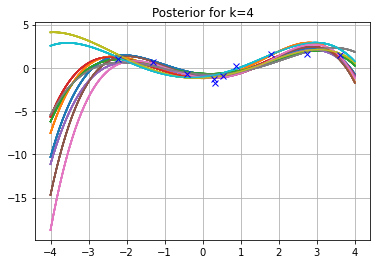

In [49]:
phi_x = compute_phi(x, k)
mean_pos, sigma_pos = posterior(phi_x, y, k)

prob_samples = np.random.multivariate_normal(mean_pos.flatten(), sigma_pos, 10) # generating 10 random variables of w
    
phi_x_samples = compute_phi(np.linspace(-4, 4, 100), k) # transforming the space

for i in range(10): # looping for each w
    plt.plot(np.linspace(-4, 4, 100), np.matmul(phi_x_samples, prob_samples.T))

plt.plot(x, y, 'bx') # plotting the main data
plt.title('Posterior for k=' + str(k))
plt.grid()
plt.show()

Part 2 -> PPD

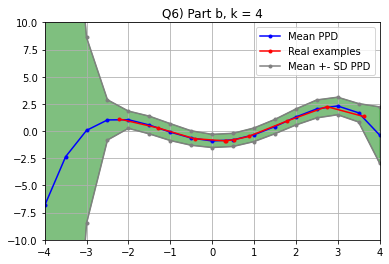

In [50]:
# Part b); Range (-4, 4)
test = [-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
phi_test = compute_phi(test, k)

p1 = []
v1 = []
for i in phi_x:
    m, v = PPD(i, mean_pos, sigma_pos)
    p1 += [m[0]]
    v1 += [v]
    
p2 = []
v2 = []
for i in phi_test:
    m, v = PPD(i, mean_pos, sigma_pos)
    p2 += [m[0]]
    v2 += [v]
     
import matplotlib.pyplot as plt
plt.grid() 
plt.xlim(-4, 4)
plt.ylim(-10, 10)   

p1 = np.asarray(p1)
p2 = np.asarray(p2)
v1 = np.asarray(v1)
v2 = np.asarray(v2)

mean_p = p2 + 2 * v2
mean_n = p2 - 2 * v2

plt.plot(test, p2, c = 'b', label = 'Mean PPD', marker = '.')  
plt.plot(x, p1, c = 'r', label = 'Real examples', marker = '.')
plt.plot(test, mean_p, c = 'gray', marker = '.', label = 'Mean +- SD PPD') 
plt.plot(test, mean_n, c = 'gray', marker = '.') 
plt.fill_between(np.linspace(-4, 4, 17), mean_p, mean_n, alpha=0.5, color = 'green')
plt.title('Q6) Part b, k = ' + str(k))
plt.legend()
plt.show()

Part 3

In [51]:
beta = 4
MLL = np.log(multivariate_normal.pdf(y, mean = np.zeros(10), cov = ((1/beta)*np.eye(10) + np.matmul(phi_x, phi_x.T))))
print ("Marginal Log-likelihood is: ", MLL)

Marginal Log-likelihood is:  -22.386776180360563


Part 4

In [52]:
# Part d): Posterior mean has same expression has wMAP; Computing likelihood for k1,2, 3, 4

LL = 0
for i in range(len(phi_x)):
    beta = 4
    data = phi_x[i]
    t1 = np.sqrt(beta/(2*3.14))
    t2 = np.exp((-beta/2)*pow((y[i] - np.matmul(mean_pos.T, data)), 2))[0]
   
    LL += np.log(t1*t2)
    
print ('Log likelihood for k = ', k , 'is', LL)

Log likelihood for k =  4 is -7.222755829382401
